In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Problem Statement :
Sebagian besar orang tidak tahu cara mencari tahu harga pesawat maka dari itu di notebook ini kita akan mengulik bersama tenatng faktor apa saja yg dapat mempengaruhi harga pesawat

## Goals
Didalam Notebook ini saya mencari tau faktor apa saja yg mempengaruhi harga pesawat dan memprediksi harga pesawat berdasarkan fitur

In [2]:
df = pd.read_csv('aircraft.csv')
df.head()

,Condition,Price,Currency,Category,Year,Make,Model,Location,S/N,REG,Total Hours,Engine 1 Hours,Engine 2 Hours,Prop 1 Hours,Prop 2 Hours,Total Seats,Flight Rules,National Origin
0,New,"$387,000",USD,Piston Helicopters,2020,ROBINSON HELICOPTER,R44 RAVEN I,FL\n\t USA,Not Listed,TBD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
1,Used,"$294,900",USD,Single Engine Piston,2011,CIRRUS,SR20-G3,"Farmingdale (KFRG),\n\t ...",2081,N187PH,1740,1740 SNEW,NaN,1740 SNEW,NaN,NaN,NaN,United States
2,Used,"$184,900",USD,Single Engine Piston,2011,CUBCRAFTERS,CC11-160 CARBON CUB SS,"Louisburg,\n\t NC\n\...",CC11-00168,N160TJ,175,175 SNEW,NaN,160 SNEW,NaN,NaN,NaN,United States
3,Used,"$609,000",USD,Single Engine Piston,2015,CIRRUS,SR22-G5 TURBO,"Knoxville,\n\t TN\n\...",1119,N619MT,738,738 HOURS,NaN,738 HOURS,NaN,5.0,IFR,United States
4,Used,"$699,000",USD,Single Engine Piston,2016,BEECHCRAFT,G36 BONANZA,"Greensboro,\n\t NC\n...",E-4100,N71RW,175,175 SNEW,175 SNEW,NaN,NaN,6.0,NaN,United States


Content scraped:
- New/Used
- Price
- Currency (USD, EUR, GBP)
- Category
- Year
- Make
- Model
- Location
- Serial number
- Registration number
- Total hours
- Engine 1 hours
- Engine 2 hours
- prop 1 hours
- prop 2 hours
- Total Seats
- Flight Rules
- National Origin
Keep in mind that the data was scraped from 2 different sources. Some of the data (New/Used, Engine 1 hours, Engine 2 hours, Prop 1 hours, Prop 2 hours, Total
Seats, Flight Rules) was only easily accessible on one source, thus is missing for part of the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Condition        1761 non-null   object 
 1   Price            2530 non-null   object 
 2   Currency         1978 non-null   object 
 3   Category         2530 non-null   object 
 4   Year             2530 non-null   object 
 5   Make             2530 non-null   object 
 6   Model            2530 non-null   object 
 7   Location         2518 non-null   object 
 8   S/N              2527 non-null   object 
 9   REG              2528 non-null   object 
 10  Total Hours      2433 non-null   object 
 11  Engine 1 Hours   1582 non-null   object 
 12  Engine 2 Hours   381 non-null    object 
 13  Prop 1 Hours     1165 non-null   object 
 14  Prop 2 Hours     263 non-null    object 
 15  Total Seats      1152 non-null   float64
 16  Flight Rules     868 non-null    object 
 17  National Origi

## Deskirpsi Data
- SNEW = Total Time Since New is usually an airframe time reference for the total number of flight hours on a used aircraft.
- TSOH = Means Time Since Overhaul, which is the number of flight hours since the overhaul was performed on that particular part.
- TBO or TBOH = This means Total Basic Operating time or Time Between Overhaul. 
- SMOH or TSMOH = This is Since Major Over Haul. 
- STOH = Since Top Over Haul. A top overhaul is a term used by the general aviation industry when all the cylinders on the engine are overhauled or replaced with new possibly due to corrosion. 
- TTSN, TSN, or TT = This refers to Total Time Since New or Time Since New or Total Time, and this is usually an airframe time reference for the total number of flight hours on a used aircraft.
- SFRM or SFRMN = This means time Since Factory Re-Manufactured, and it is the time flown since the engine was re-manufactured by Lycoming, Continental, or some other approved engine shop. 

In [4]:
df.isna().sum()

Condition           769
Price                 0
Currency            552
Category              0
Year                  0
Make                  0
Model                 0
Location             12
S/N                   3
REG                   2
Total Hours          97
Engine 1 Hours      948
Engine 2 Hours     2149
Prop 1 Hours       1365
Prop 2 Hours       2267
Total Seats        1378
Flight Rules       1662
National Origin       8
dtype: int64

In [5]:
pd.set_option('display.max_rows', 20)

In [6]:
df[df.duplicated()] 
print(df.duplicated().value_counts())

False    2527
True        3
dtype: int64


In [7]:
df_desc = []
for i in df.columns:
    df_desc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum())/ (len(df))*100),2),
        df[i].nunique(),
        df[i].unique()
    ])

In [8]:
df_desc = pd.DataFrame(df_desc, columns = ['Data Features', 'Data Types', 'NaN', 'NaN Percentage', 'Unique', 'Unique Sample'])
df_desc

,Data Features,Data Types,NaN,NaN Percentage,Unique,Unique Sample
0,Condition,object,769,30.40,3,"[New, Used, Project, nan]"
1,Price,object,0,0.00,1160,"[$387,000 , $294,900 , $184,900 , $609,000 , $..."
2,Currency,object,552,21.82,5,"[USD, EUR, CHF, CAD, GBP, nan]"
3,Category,object,0,0.00,13,"[Piston Helicopters, Single Engine Piston, Pri..."
4,Year,object,0,0.00,94,"[2020, 2011, 2015, 2016, 2017, 2018, 1980, 198..."
5,Make,object,0,0.00,187,"[ROBINSON HELICOPTER, CIRRUS, CUBCRAFTERS, BEE..."
6,Model,object,0,0.00,1020,"[R44 RAVEN I, SR20-G3, CC11-160 CARBON CUB SS,..."
7,Location,object,12,0.47,1007,"[FL\n\t USA, Farming..."
8,S/N,object,3,0.12,1824,"[Not Listed, 2081, CC11-00168, 1119, E-4100, 1..."
9,REG,object,2,0.08,2029,"[TBD, N187PH, N160TJ, N619MT, N71RW, N686AG, N..."


In [9]:
df.describe()

,Total Seats
count,1152.000000
mean,4.331597
std,2.504094
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,56.000000


## Handle Missing Data

Karena NaN Value lebih dari 60% maka di drop

In [10]:
# df.drop(columns='Engine 2 Hours', inplace=True)

In [11]:
# df.drop(columns='Prop 2 Hours', inplace=True)

In [12]:
# df.drop(columns='Flight Rules', inplace=True)

In [13]:
df.head()

,Condition,Price,Currency,Category,Year,Make,Model,Location,S/N,REG,Total Hours,Engine 1 Hours,Engine 2 Hours,Prop 1 Hours,Prop 2 Hours,Total Seats,Flight Rules,National Origin
0,New,"$387,000",USD,Piston Helicopters,2020,ROBINSON HELICOPTER,R44 RAVEN I,FL\n\t USA,Not Listed,TBD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
1,Used,"$294,900",USD,Single Engine Piston,2011,CIRRUS,SR20-G3,"Farmingdale (KFRG),\n\t ...",2081,N187PH,1740,1740 SNEW,NaN,1740 SNEW,NaN,NaN,NaN,United States
2,Used,"$184,900",USD,Single Engine Piston,2011,CUBCRAFTERS,CC11-160 CARBON CUB SS,"Louisburg,\n\t NC\n\...",CC11-00168,N160TJ,175,175 SNEW,NaN,160 SNEW,NaN,NaN,NaN,United States
3,Used,"$609,000",USD,Single Engine Piston,2015,CIRRUS,SR22-G5 TURBO,"Knoxville,\n\t TN\n\...",1119,N619MT,738,738 HOURS,NaN,738 HOURS,NaN,5.0,IFR,United States
4,Used,"$699,000",USD,Single Engine Piston,2016,BEECHCRAFT,G36 BONANZA,"Greensboro,\n\t NC\n...",E-4100,N71RW,175,175 SNEW,175 SNEW,NaN,NaN,6.0,NaN,United States


In [14]:
df['Price'] = df['Price'].str.strip('$')

In [15]:
df['Price'] = df['Price'].str.replace(',','')

In [16]:
df['Price'] = df['Price'].str.strip(' ')

In [17]:
df['Price'] = df['Price'].str.replace("",'')

In [18]:
df['Price'] = df['Price'].str.strip("Price:")

In [19]:
df['Price'] = df['Price'].str.strip("USD $")

In [20]:
df['Price'] = df['Price'].str.strip("Â£")

In [21]:
df['Price'] = df['Price'].str.strip("")

In [22]:
df['Price'] = df['Price'].str.strip("NEW")

In [23]:
df['Price'] = df['Price'].str.strip("â‚¬")

In [24]:
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')

In [25]:
df['Price'] = df['Price'].replace(np.nan, 0, regex=True)

In [26]:
df['Price'] = df['Price'].astype('int')

In [27]:
df.dtypes

Condition           object
Price                int32
Currency            object
Category            object
Year                object
Make                object
Model               object
Location            object
S/N                 object
REG                 object
Total Hours         object
Engine 1 Hours      object
Engine 2 Hours      object
Prop 1 Hours        object
Prop 2 Hours        object
Total Seats        float64
Flight Rules        object
National Origin     object
dtype: object

In [28]:
df['Price'].value_counts()

85000      21
225000     21
65000      21
165000     20
110000     19
           ..
1175000     1
239950      1
1199000     1
22850       1
0           1
Name: Price, Length: 879, dtype: int64

In [29]:
regex = r'^(\d{4})'

In [30]:
df['Year'] = df['Year'].str.extract(r'^(\d{4})', expand=False)

In [31]:
df['Year'].value_counts()

1978    86
1979    85
1977    81
2007    81
1981    77
        ..
1937     1
2021     1
1922     1
1935     1
1927     1
Name: Year, Length: 92, dtype: int64

In [32]:
df['Year'] = pd.to_numeric(df['Year'])
df['Year'].dtype

dtype('float64')

In [33]:
df['Total Hours'] = df['Total Hours'].str.extract(r'^(\d{4})', expand=False)

In [34]:
df['Total Hours'].value_counts()

2200    12
1200    10
2000     8
1100     7
1900     6
        ..
4560     1
8656     1
9345     1
2306     1
3681     1
Name: Total Hours, Length: 1353, dtype: int64

In [35]:
df['Total Hours'] = df['Total Hours'].str.strip("hrs")

In [36]:
# df['Total Hours'] = pd.to_numeric(df['Total Hours'],errors='coerce')
# df['Total Hours'] = df['Total Hours'].replace(np.nan, 0, regex=True)
# df['Total Hours'] = df['Total Hours'].astype('int')

In [37]:
df['Total Hours'] = pd.to_numeric(df['Total Hours'])
df['Total Hours'].dtype

dtype('float64')

In [38]:
df['Engine 1 Hours'].dtypes

dtype('O')

In [39]:
df['Engine 1 Hours'] = df['Engine 1 Hours'].str.extract(r'^(\d{4})', expand=False)

In [40]:
df['Engine 1 Hours'].value_counts()

1450    10
1250     9
1100     6
1200     6
1000     5
        ..
6232     1
1253     1
1445     1
1204     1
1882     1
Name: Engine 1 Hours, Length: 401, dtype: int64

In [41]:
# df['Engine 1 Hours'] = pd.to_numeric(df['Engine 1 Hours'],errors='coerce')
# df['Engine 1 Hours'] = df['Engine 1 Hours'].replace(np.nan, 0, regex=True)
# df['Engine 1 Hours'] = df['Engine 1 Hours'].astype('int')

In [42]:
df['Engine 1 Hours'] = pd.to_numeric(df['Engine 1 Hours'])
df['Engine 1 Hours'].dtype

dtype('float64')

In [43]:
df['Engine 2 Hours'] = df['Engine 2 Hours'].str.extract(r'^(\d{4})', expand=False)

In [44]:
df['Engine 2 Hours'] = pd.to_numeric(df['Engine 2 Hours'])
df['Engine 2 Hours'].dtype

dtype('float64')

In [45]:
df['Prop 1 Hours'] = df['Prop 1 Hours'].str.extract(r'^(\d{4})', expand=False)

In [46]:
df['Prop 1 Hours'] = pd.to_numeric(df['Prop 1 Hours'])
df['Prop 1 Hours'].dtype

dtype('float64')

In [47]:
df['Prop 2 Hours'] = df['Prop 2 Hours'].str.extract(r'^(\d{4})', expand=False)

In [48]:
df['Prop 2 Hours'] = pd.to_numeric(df['Prop 2 Hours'])
df['Prop 2 Hours'].dtype

dtype('float64')

In [49]:
df.dtypes

Condition           object
Price                int32
Currency            object
Category            object
Year               float64
Make                object
Model               object
Location            object
S/N                 object
REG                 object
Total Hours        float64
Engine 1 Hours     float64
Engine 2 Hours     float64
Prop 1 Hours       float64
Prop 2 Hours       float64
Total Seats        float64
Flight Rules        object
National Origin     object
dtype: object

In [50]:
# df.drop(columns=['S/N'], inplace=True )

In [51]:
df.head()

,Condition,Price,Currency,Category,Year,Make,Model,Location,S/N,REG,Total Hours,Engine 1 Hours,Engine 2 Hours,Prop 1 Hours,Prop 2 Hours,Total Seats,Flight Rules,National Origin
0,New,387000,USD,Piston Helicopters,2020.0,ROBINSON HELICOPTER,R44 RAVEN I,FL\n\t USA,Not Listed,TBD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
1,Used,294900,USD,Single Engine Piston,2011.0,CIRRUS,SR20-G3,"Farmingdale (KFRG),\n\t ...",2081,N187PH,1740.0,1740.0,NaN,1740.0,NaN,NaN,NaN,United States
2,Used,184900,USD,Single Engine Piston,2011.0,CUBCRAFTERS,CC11-160 CARBON CUB SS,"Louisburg,\n\t NC\n\...",CC11-00168,N160TJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
3,Used,609000,USD,Single Engine Piston,2015.0,CIRRUS,SR22-G5 TURBO,"Knoxville,\n\t TN\n\...",1119,N619MT,NaN,NaN,NaN,NaN,NaN,5.0,IFR,United States
4,Used,699000,USD,Single Engine Piston,2016.0,BEECHCRAFT,G36 BONANZA,"Greensboro,\n\t NC\n...",E-4100,N71RW,NaN,NaN,NaN,NaN,NaN,6.0,NaN,United States


## Exploratory Data Analysis

In [52]:
df_cat = df[['Condition', 'Currency', 'Category', 'Make', 'Model', 'Location', 'S/N', 'REG', 'National Origin']]
df_num = df[['Price', 'Year', 'Total Seats', 'Total Hours','Engine 1 Hours', 'Prop 1 Hours']]

In [53]:
USA = df['Location'].str.contains('USA')
CANADA = df['Location'].str.contains('CAN')
BELGIUM = df['Location'].str.contains('BEL')
FRANCE = df['Location'].str.contains('FRA')
KENYA = df['Location'].str.contains('KEN')
POLAND = df['Location'].str.contains('POL')
NIGERIA = df['Location'].str.contains('NGA')
SERBIA = df['Location'].str.contains('SRB')
SOUTH_AFRICA = df['Location'].str.contains('ZAF')
MEXICO = df['Location'].str.contains('MEX')
SWISS = df['Location'].str.contains('CHE')
EUR = df['Location'].str.contains('Europe')
NOR = df['Location'].str.contains('North America')
NORA = df['Location'].str.contains('North America + Canada')

In [54]:
df['Location'] = np.where(USA, 'USA',np.where(CANADA, 'CAN', np.where(BELGIUM, 'BEL', np.where(FRANCE, 'FRA', np.where(KENYA, 'KEN', np.where(MEXICO, 'MEX', np.where(POLAND, 'POL', np.where(NIGERIA, 'NGA',np.where(SERBIA, 'SRB', np.where(SOUTH_AFRICA, 'ZAF',np.where(EUR, 'Europe',np.where(NOR, 'North America',np.where(NORA, 'North America + Canada', df['Location'].str.replace('-', ' '))))))))))))))

graph for Condition: total = 3


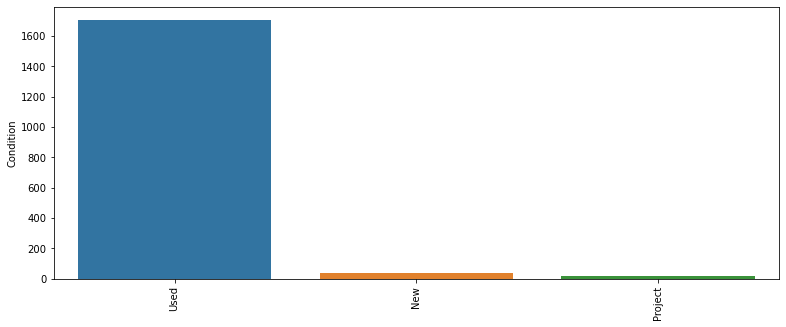

graph for Currency: total = 5


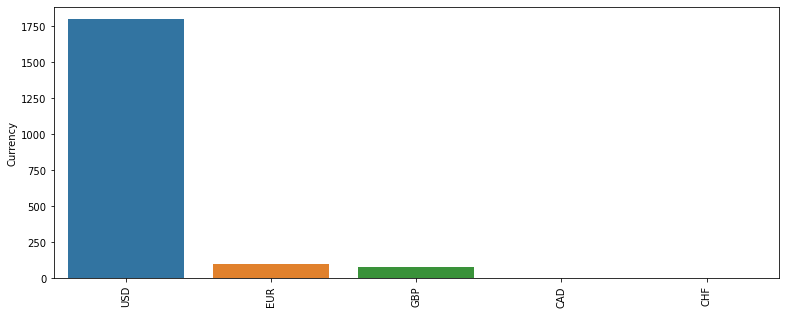

graph for Category: total = 13


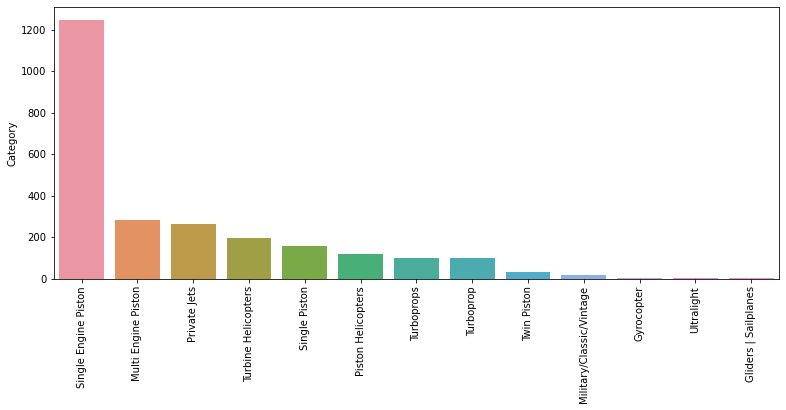

graph for Make: total = 187


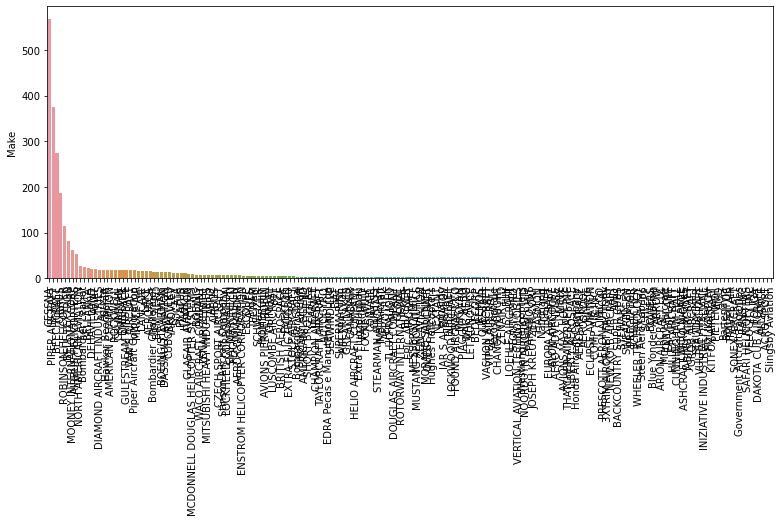

graph for Model: total = 1020


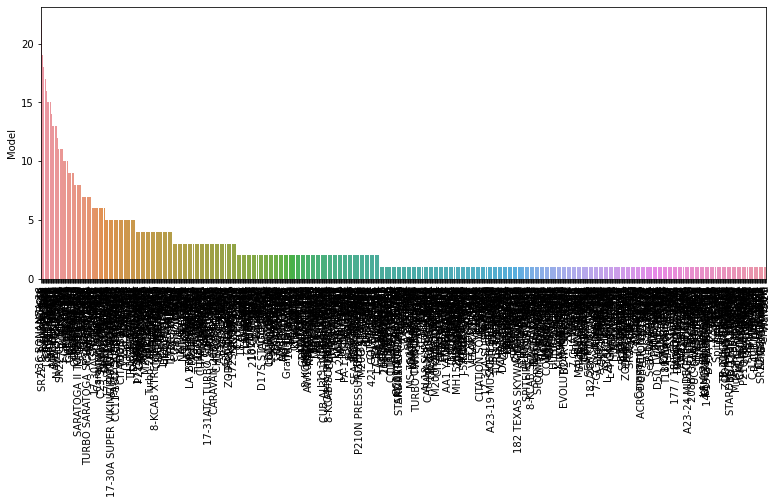

graph for Location: total = 1007


C:\Users\endim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\endim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


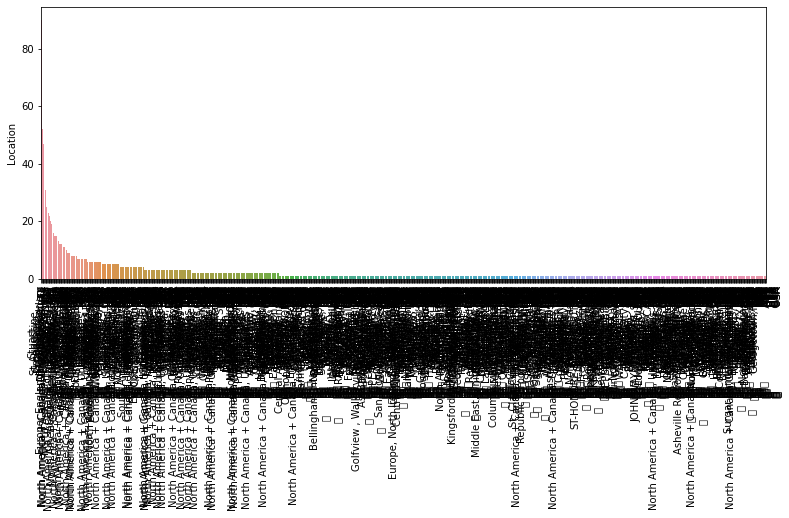

graph for S/N: total = 1824


C:\Users\endim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\endim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0, flags=flags)


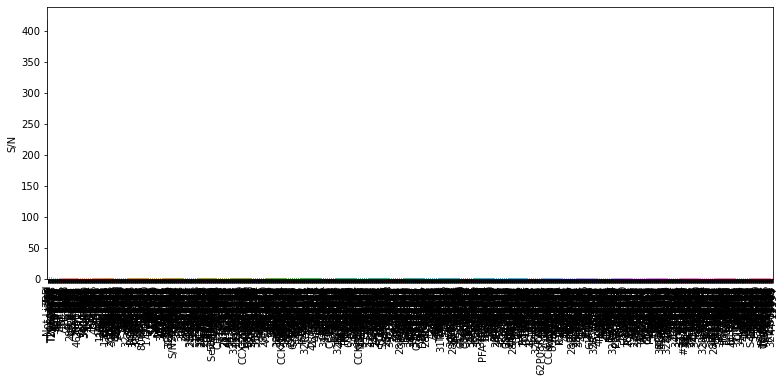

graph for REG: total = 2029


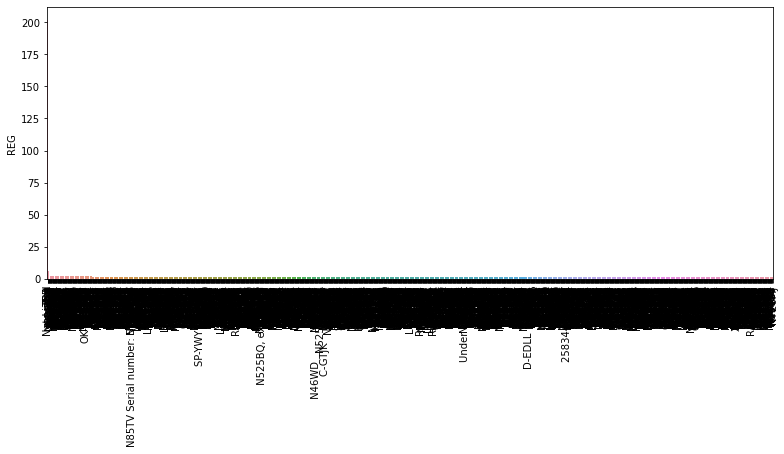

graph for National Origin: total = 26


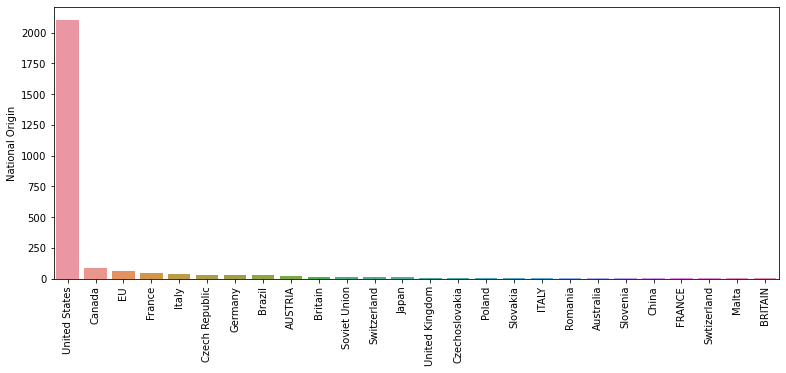

In [55]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('graph for %s: total = %d' % (i,len(cat_num)))
    plt.figure(figsize=(13, 5))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

## Note:
- Kolom S/N adalah serial number
- Kolom REG adalah Tail Number

In [56]:
df['Make'].value_counts()

CESSNA                 567
PIPER AIRCRAFT         374
BEECHCRAFT             275
CIRRUS                 186
ROBINSON HELICOPTER    115
                      ... 
FOUGA                    1
DAKOTA CUB AIRCRAFT      1
ALLIANCE                 1
ACRO SPORT               1
Slingsby Aviation        1
Name: Make, Length: 187, dtype: int64

In [57]:
df['Model'].value_counts()

A36 BONANZA 36       22
ARROW                22
R66                  19
SR22-G3 TURBO GTS    18
340A                 18
                     ..
TB-21 Trinidad        1
150K                  1
CITATION III          1
S-2C                  1
Warrior II            1
Name: Model, Length: 1020, dtype: int64

In [58]:
df['S/N'].value_counts()

Not Listed    417
-             128
TBD            10
1               4
36              4
             ... 
51204           1
32R-802904      1
33938           1
44-75009        1
11194           1
Name: S/N, Length: 1824, dtype: int64

In [59]:
df['Location'].value_counts()

USA                                                                                    1641
North America                                                                           333
Europe                                                                                  264
CAN                                                                                     112
Africa, South Africa                                                                     53
                                                                                       ... 
KCHD                                                                                      1
Durango                                                                                   1
Ciudad de la Costa\n\t                           \n\t                           URY       1
Corvallis                                                                                 1
Amsterdam\n\t                           \n\t                           NLD      

In [60]:
df['Make'].value_counts()

CESSNA                 567
PIPER AIRCRAFT         374
BEECHCRAFT             275
CIRRUS                 186
ROBINSON HELICOPTER    115
                      ... 
FOUGA                    1
DAKOTA CUB AIRCRAFT      1
ALLIANCE                 1
ACRO SPORT               1
Slingsby Aviation        1
Name: Make, Length: 187, dtype: int64

In [61]:
df.head()

,Condition,Price,Currency,Category,Year,Make,Model,Location,S/N,REG,Total Hours,Engine 1 Hours,Engine 2 Hours,Prop 1 Hours,Prop 2 Hours,Total Seats,Flight Rules,National Origin
0,New,387000,USD,Piston Helicopters,2020.0,ROBINSON HELICOPTER,R44 RAVEN I,USA,Not Listed,TBD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
1,Used,294900,USD,Single Engine Piston,2011.0,CIRRUS,SR20-G3,USA,2081,N187PH,1740.0,1740.0,NaN,1740.0,NaN,NaN,NaN,United States
2,Used,184900,USD,Single Engine Piston,2011.0,CUBCRAFTERS,CC11-160 CARBON CUB SS,USA,CC11-00168,N160TJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
3,Used,609000,USD,Single Engine Piston,2015.0,CIRRUS,SR22-G5 TURBO,USA,1119,N619MT,NaN,NaN,NaN,NaN,NaN,5.0,IFR,United States
4,Used,699000,USD,Single Engine Piston,2016.0,BEECHCRAFT,G36 BONANZA,USA,E-4100,N71RW,NaN,NaN,NaN,NaN,NaN,6.0,NaN,United States


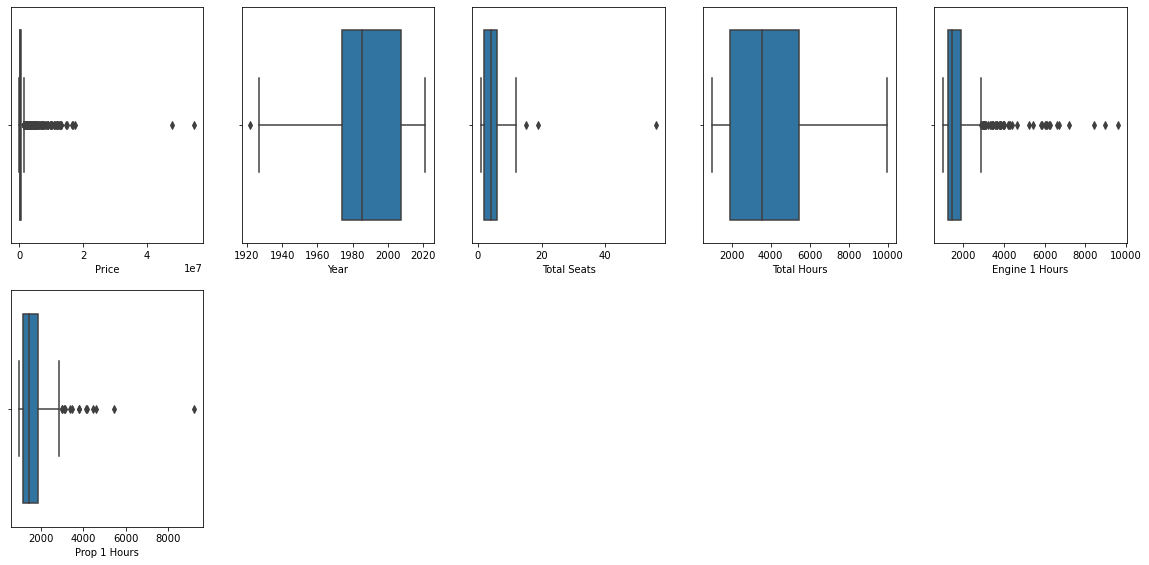

In [62]:
plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_num.columns:
    plt.subplot(4,5,x)
    sns.boxplot(df_num[column])
    x+=1
plt.tight_layout
plt.show()

## Data Outliers kita biarkan karena tidak mengganggu

In [63]:
## Filling data

In [64]:
df.isna().sum()

Condition           769
Price                 0
Currency            552
Category              0
Year                 79
Make                  0
Model                 0
Location              0
S/N                   3
REG                   2
Total Hours         773
Engine 1 Hours     2000
Engine 2 Hours     2353
Prop 1 Hours       2290
Prop 2 Hours       2478
Total Seats        1378
Flight Rules       1662
National Origin       8
dtype: int64

In [65]:
# df['Condition'] = df['Condition'].replace(0)

In [66]:
# df['Currency'] = df['Currency'].fillna(0)

In [67]:
# df['Year'] = df['Year'].fillna(method='ffill')

In [68]:
# df['Total Hours'] = df['Total Hours'].fillna(method='ffill')

In [69]:
# df['Engine 2 Hours'] = df['Engine 2 Hours'].fillna(method='ffill')

In [70]:
# df['Total Seats'] = df['Total Seats'].fillna(method='ffill')

In [71]:
# df['Prop 1 Hours'] = df['Prop 1 Hours'].fillna(method='ffill')

In [72]:
# df['Prop 2 Hours'] = df['Prop 2 Hours'].fillna(method='ffill')

In [73]:
# df['Flight Rules'] = df['Flight Rules'].fillna(method='ffill')

In [74]:
# df['National Origin'] = df['National Origin'].fillna(method='ffill')

In [75]:
# df.dropna(inplace=True)

In [76]:
df.head()

,Condition,Price,Currency,Category,Year,Make,Model,Location,S/N,REG,Total Hours,Engine 1 Hours,Engine 2 Hours,Prop 1 Hours,Prop 2 Hours,Total Seats,Flight Rules,National Origin
0,New,387000,USD,Piston Helicopters,2020.0,ROBINSON HELICOPTER,R44 RAVEN I,USA,Not Listed,TBD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
1,Used,294900,USD,Single Engine Piston,2011.0,CIRRUS,SR20-G3,USA,2081,N187PH,1740.0,1740.0,NaN,1740.0,NaN,NaN,NaN,United States
2,Used,184900,USD,Single Engine Piston,2011.0,CUBCRAFTERS,CC11-160 CARBON CUB SS,USA,CC11-00168,N160TJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
3,Used,609000,USD,Single Engine Piston,2015.0,CIRRUS,SR22-G5 TURBO,USA,1119,N619MT,NaN,NaN,NaN,NaN,NaN,5.0,IFR,United States
4,Used,699000,USD,Single Engine Piston,2016.0,BEECHCRAFT,G36 BONANZA,USA,E-4100,N71RW,NaN,NaN,NaN,NaN,NaN,6.0,NaN,United States


In [77]:
## Encode

In [78]:
from sklearn.preprocessing import OneHotEncoder

In [79]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
df.to_csv('out.zip', index=False,
          compression=compression_opts)

In [80]:
encoding = OneHotEncoder()

In [81]:
pd.get_dummies(data=df, columns=['Condition'], prefix_sep='_')

,Price,Currency,Category,Year,Make,Model,Location,S/N,REG,Total Hours,Engine 1 Hours,Engine 2 Hours,Prop 1 Hours,Prop 2 Hours,Total Seats,Flight Rules,National Origin,Condition_New,Condition_Project,Condition_Used
0,387000,USD,Piston Helicopters,2020.0,ROBINSON HELICOPTER,R44 RAVEN I,USA,Not Listed,TBD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,1,0,0
1,294900,USD,Single Engine Piston,2011.0,CIRRUS,SR20-G3,USA,2081,N187PH,1740.0,1740.0,NaN,1740.0,NaN,NaN,NaN,United States,0,0,1
2,184900,USD,Single Engine Piston,2011.0,CUBCRAFTERS,CC11-160 CARBON CUB SS,USA,CC11-00168,N160TJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,0,0,1
3,609000,USD,Single Engine Piston,2015.0,CIRRUS,SR22-G5 TURBO,USA,1119,N619MT,NaN,NaN,NaN,NaN,NaN,5.0,IFR,United States,0,0,1
4,699000,USD,Single Engine Piston,2016.0,BEECHCRAFT,G36 BONANZA,USA,E-4100,N71RW,NaN,NaN,NaN,NaN,NaN,6.0,NaN,United States,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,36000,GBP,Single Piston,1994.0,AVIONS PIERRE ROBIN,HR-200/120B,Europe,-,-,3600.0,NaN,NaN,NaN,NaN,NaN,NaN,France,0,0,0
2526,36000,GBP,Single Piston,1978.0,AVIONS PIERRE ROBIN,R.2160,Europe,-,-,5300.0,NaN,NaN,NaN,NaN,NaN,NaN,France,0,0,0
2527,36000,GBP,Single Piston,1965.0,CESSNA,172,Europe,-,-,6200.0,NaN,NaN,NaN,NaN,4.0,NaN,United States,0,0,0
2528,36500,EUR,Single Piston,NaN,CESSNA,150 FRA150L,Europe,-,N53TS,NaN,NaN,NaN,NaN,NaN,2.0,NaN,United States,0,0,0


In [82]:
# pd.get_dummies(data=df, columns=['Condition'], prefix_sep='_')

In [83]:
# data = encoding.fit_transform(df[['Condition']]).toarray()

In [84]:
# encoding.categories_

In [85]:
# df_enc = pd.DataFrame(data = data, columns=encoding.categories_)

In [86]:
# df_enc

In [87]:
# df.dropna(inplace=True)

In [88]:
correlation = df.corr()
correlation['Price'].sort_values(ascending = False)[1:]

Total Seats       0.369266
Engine 1 Hours    0.310392
Year              0.270775
Engine 2 Hours    0.189640
Prop 2 Hours      0.066804
Prop 1 Hours     -0.038334
Total Hours      -0.051127
Name: Price, dtype: float64

## Machine Learning

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X = df.drop(columns='Price')
y = df['Price']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state=42)

In [113]:
X_train.shape

(2024, 17)

In [114]:
X_test.shape

(506, 17)

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
modelLR = LogisticRegression()

In [117]:
modelLR.fit(X_train, y_train)

ValueError: could not convert string to float: 'Australia'

In [92]:
from sklearn.pipeline import Pipeline

In [93]:
from sklearn.impute import SimpleImputer

In [94]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler

In [95]:
#### Base Model

In [96]:
### Feature Selection

In [97]:
df.drop(columns=['S/N', 'REG'], inplace=True)

In [98]:
cat_columns = ['Condition', 'Currency', 'Category', 'Make', 'Model', 'Location', 'National Origin']
num_columns = ['Year', 'Total Seats', 'Total Hours','Engine 1 Hours','Engine 2 Hours', 'Prop 1 Hours', 'Prop 2 Hours']

In [99]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler()),
])



categorical_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

In [100]:
X_train_cat = categorical_pipeline.fit_transform(X_train[cat_columns])

In [101]:
X_train_cat.toarray()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [102]:
X_train_num = numerical_pipeline.fit_transform(X_train[num_columns])

In [103]:
from sklearn.compose import ColumnTransformer

In [104]:
preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categorical', categorical_pipeline, cat_columns)
])

In [105]:
X_train.head()

,Condition,Currency,Category,Year,Make,Model,Location,S/N,REG,Total Hours,Engine 1 Hours,Engine 2 Hours,Prop 1 Hours,Prop 2 Hours,Total Seats,Flight Rules,National Origin
1990,NaN,NaN,Private Jets,2009.0,EMBRAER,Phenom 100,North America,50000022,N522EP,2649.0,NaN,NaN,NaN,NaN,NaN,NaN,Brazil
157,Used,USD,Turboprop,2007.0,CESSNA,CARAVAN 208 AMPHIBIAN,USA,20800413,N984JD,3973.0,1228.0,NaN,1228.0,NaN,NaN,NaN,United States
1472,Used,USD,Single Engine Piston,1964.0,PIPER AIRCRAFT,CHEROKEE 180,USA,Not Listed,N7860W,2596.0,NaN,NaN,NaN,NaN,4.0,IFR,United States
790,Used,USD,Single Engine Piston,2006.0,AVIAT,HUSKY A-1B,USA,2354,N706BH,1110.0,1110.0,NaN,NaN,NaN,NaN,NaN,United States
2075,NaN,EUR,Turbine Helicopters,2007.0,AIRBUS HELICOPTERS,EC 130B4,Europe,4219,LY-HTB,1420.0,NaN,NaN,NaN,NaN,NaN,NaN,EU


In [106]:
X_train.isna().sum()

Condition           619
Currency            454
Category              0
Year                 67
Make                  0
Model                 0
Location              0
S/N                   3
REG                   0
Total Hours         616
Engine 1 Hours     1605
Engine 2 Hours     1885
Prop 1 Hours       1829
Prop 2 Hours       1984
Total Seats        1107
Flight Rules       1338
National Origin       7
dtype: int64

In [107]:
X_train_prep = preprocessor.fit_transform(X_train)

In [108]:
X_test_prep = preprocessor.fit_transform(X_test)

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
RF = RandomForestRegressor()

In [111]:
RF.fit(X_train_prep, y_train)

RandomForestRegressor()

In [112]:
RF.score(X_test_prep, y_test)

ValueError: Number of features of the model must match the input. Model n_features is 1183 and input n_features is 500 

In [ ]:
from xgboost import XGBRegressor

In [ ]:
XGB = XGBRegressor()

In [ ]:
XGB.fit(X_train_prep, y_train)

In [ ]:
XGB.score(X_test_prep, y_test)